## 5) Data Visualization

**Instructions:**
1. Plot histograms for all variables to understand their distributions.
2. Calculate the correlation matrix and plot the heatmap to identify relationships between variables.

Plotting histograms for all variables:



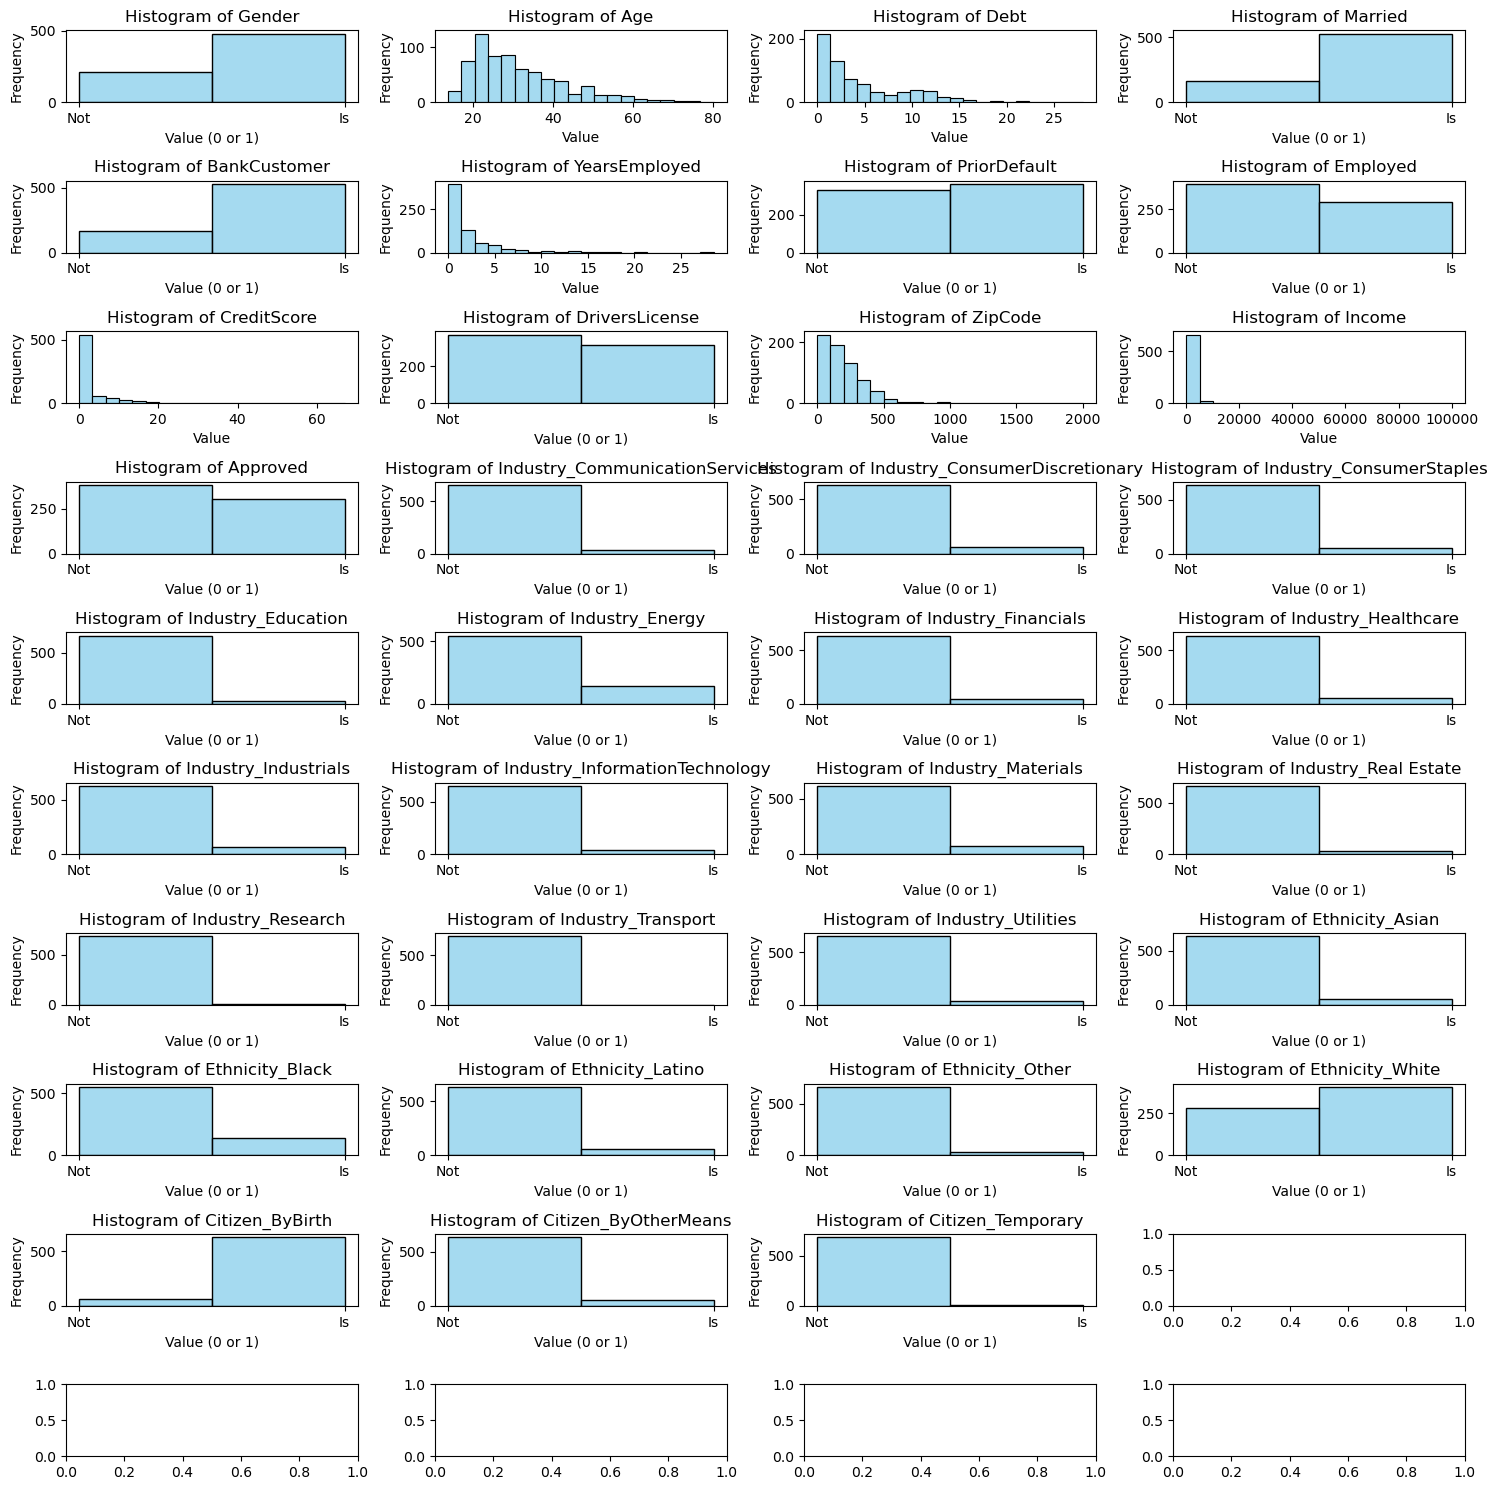

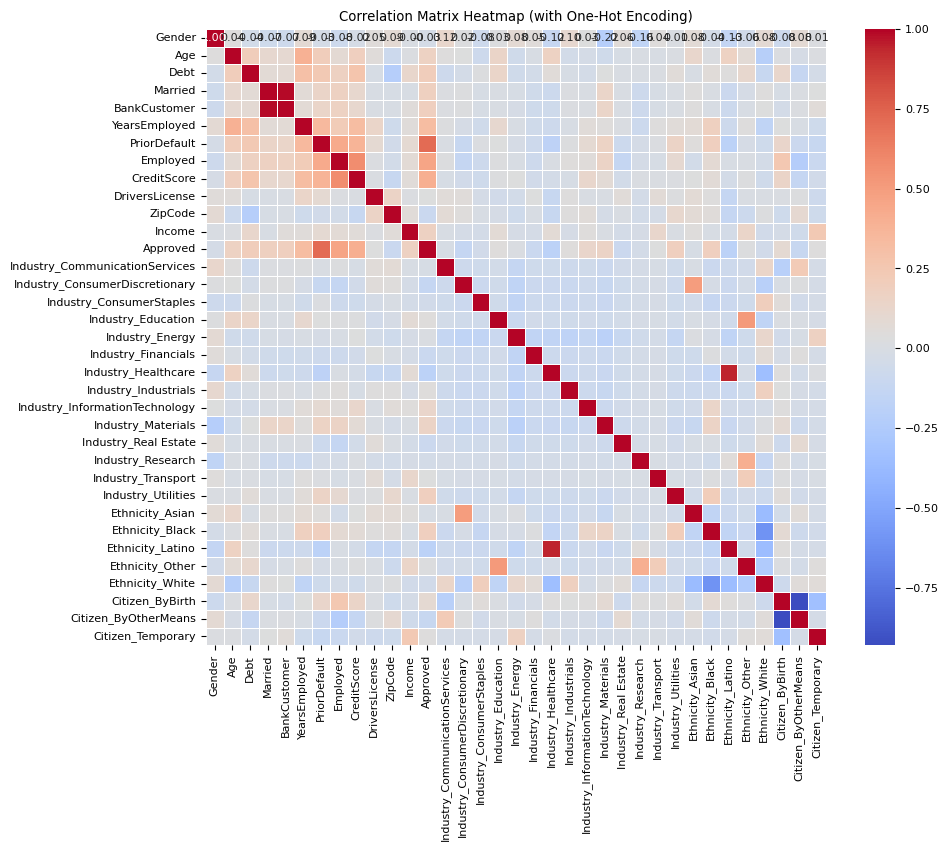

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder


#Load Data Set
data = pd.read_excel("/Users/abhirajchaudhary/Downloads/Approval.xlsx")

# PLOTTING HISTOGRAMS FOR ALL VARIABLES


# Convert object columns to categorical if needed
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category')


# Perform one-hot encoding for all categorical columns
categorical_cols = data.select_dtypes(include=['category']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols)

#disable warnings for inf to nan conversion when using seaborn library but only during histogram construction 
#normally place on top of header
import warnings

# Function to plot histograms for each column
def plot_histograms(data):

    print("Plotting histograms for all variables:\n")
    num_cols = len(data.columns)
    rows = 10 # Define the number of rows to fit all histograms
    
    # Calculate number of columns per row based on available space
    cols_per_row = num_cols // rows
    if num_cols % rows != 0:
        cols_per_row += 1  # Handle the case where num_cols is not perfectly divisible by rows
    
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 15))
    axes = axes.flatten()

    noyes = ('Not', 'Is')
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')

        for i, column in enumerate(data.columns):
            ax = axes[i]
            if data_encoded[column].nunique() == 2:
                # Binary column (0 or 1)
                sns.histplot(data_encoded[column], bins=2, kde=False, color='skyblue', ax=ax)
                ax.set_title(f'Histogram of {column}')
                ax.set_xlabel(f'Value (0 or 1)')
                ax.set_ylabel('Frequency')
                ax.set_xticks(np.arange(2), labels=noyes)
            else:
                # Numerical column
                sns.histplot(data_encoded[column], bins=20, kde=False, color='skyblue', ax=ax)
                ax.set_title(f'Histogram of {column}')
                ax.set_xlabel('Value')
                ax.set_ylabel('Frequency')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Plot histograms
plot_histograms(data_encoded)

# Now, calculate and plot the correlation heatmap

# Convert object columns to categorical if needed (if not already done)
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category')

# Perform one-hot encoding for categorical columns
data_encoded = pd.get_dummies(data)

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Decrease font size in plots (optional)
plt.rcParams['font.size'] = 8

# Plot the heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (with One-Hot Encoding)')
plt.show()

## <span style="color:red">*Q4. What do the histograms for all variables look like?*</span>

## <span style="color:black">*A4. The histograms of the categorical variables have been divided into sub variables where their values are either 1 or 0 indicating their prescence (1) or absence (0). The histograms of the variables on the other hand seem to have actual numerical values on the x-axis suggesting that they consist of numerical data.*</span>

## <span style="color:red">*Q5. What does the correlation matrix and heatmap reveal about relationships between variables?*</span>

## <span style="color:black">*The heatmap and correlation matrix suggest that there is no strong correlation but several moderate correlations. Moreover, we can clearly also see that that most of the variables have correlation close to 0 which means that they are mostly indepenedent and not heavily influenced by other variables. The fact that the variables have a higher correlation matrix reading that the sub-variables show that they had been distinctly grouped, which also makes a lot of sense.*</span>